 ## What are the chances of a customer buying a product based on their gender?

# **Bank Marketing Data Set**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Attribute Information:

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Exploring and creating a logistic model using banking data:

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a DataFrame variable containing the banking data CSV file.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None) #to show all columns when displaying dataframes, which allows you to view all the columns of a dataframe 
#in the output instead of truncating them with ellipses ("...").
bankData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Algo/2. Logistic Regression/1. UCI Banking and Marketing data set /banking.csv')

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')



In [4]:
# Explore the dataset and determine what the dependent variable (target array) is. 
print(bankData.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [5]:
print(bankData.shape)

(41188, 21)


In [6]:
print(bankData.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


In [7]:
print(bankData.isnull().sum())

#to calculate the number of missing (null) values in each column of the bankData dataframe. 
#The isnull() method is used to generate a boolean mask that indicates whether each element in the dataframe is null or missing. 
#The sum() method is then applied on this boolean mask to count the number of True values, which represents the number of missing values in each column.



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Data set has no missing values

In [8]:
bankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Visualizing categorical variables

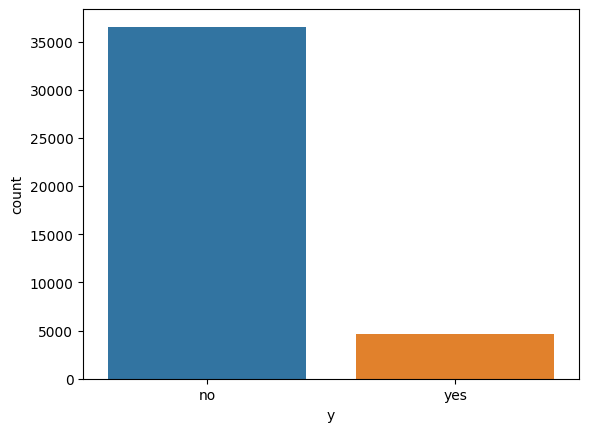

In [9]:
# Labels against frequency 
plt.figure()
sb.countplot(x='y', data=bankData)

plt.show()

#to create a count plot to display the frequency of labels in the 'y' column of the bankData dataframe. 
#The countplot() function from seaborn is used to create the plot.

Majority of the people did not convert

Dataset is imbalanced 

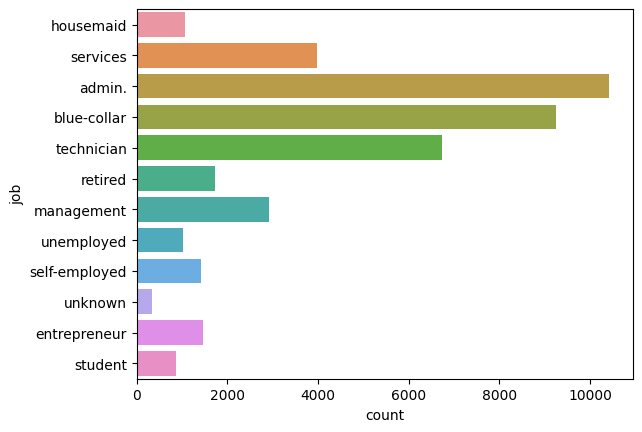

In [10]:
# Distribution of Jobs
plt.figure()
sb.countplot(y='job', data=bankData)

plt.show()

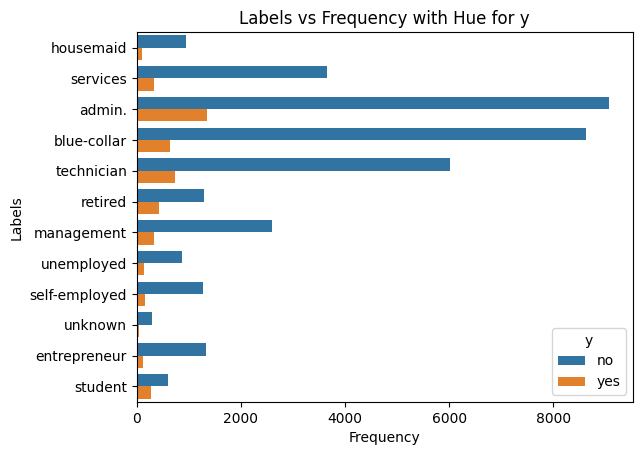

In [11]:
# Create a countplot with hue for 'job' variable
sb.countplot(y='job', hue='y', data=bankData)

# Set the title and labels for the plot
plt.title("Labels vs Frequency with Hue for y")
plt.xlabel("Frequency")
plt.ylabel("Labels")

# Display the plot
plt.show()

In [12]:
# Create a contingency table or crosstab between 'y' and 'job' columns
contingency_table = pd.crosstab(index=bankData['y'], columns=bankData['job'])

# Print the contingency table
print(contingency_table)

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37  


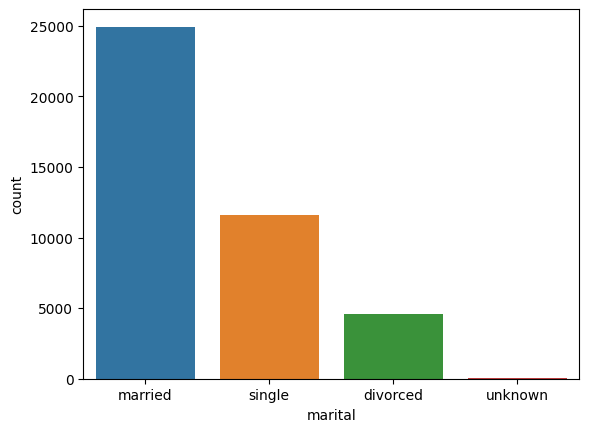

In [13]:
# Distribution on marital status
plt.figure()
sb.countplot(x='marital', data=bankData)

plt.show()

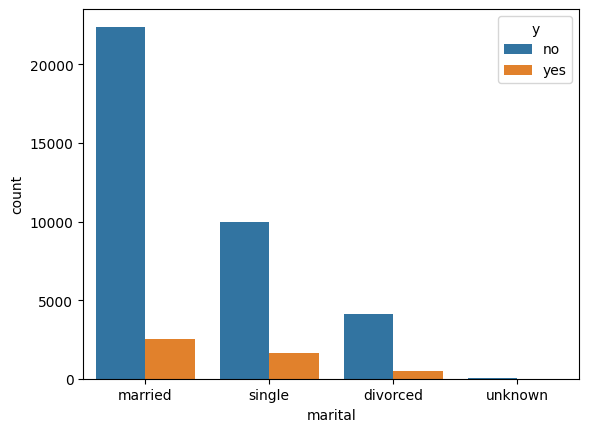

In [14]:
# Distribution on marital status with y variable
plt.figure()
sb.countplot(x='marital', hue = 'y',data=bankData)

plt.show()

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [15]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
# Create dummy variables for all the categorical variables that you have kept.
df2 = pd.get_dummies(bankData, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'education','contact'])

In [17]:
# Determine what features to include in the model. Remove the features you won’t include from the dataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  object 
 2   day_of_week                    41188 non-null  object 
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   emp.var.rate                   41188 non-null  float64
 8   cons.price.idx                 41188 non-null  float64
 9   cons.conf.idx                  41188 non-null  float64
 10  euribor3m                      41188 non-null  float64
 11  nr.employed                    41188 non-null  float64
 12  y                              41188 non-null 

In [18]:
# Drop one variable from each of the sets of dummy vraibles. No information will be lost.  
df2.drop( ['job_unknown', 'marital_unknown' , 'default_unknown', 'housing_unknown', 'loan_unknown' , 'poutcome_nonexistent'
          ,'education_unknown','contact_telephone'], axis=1, inplace = True )

#Drop variables that do might not have an impact on the output  
df2.drop( ['month', 'day_of_week'], axis=1, inplace = True )

In [19]:
# check data types of all the variables. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [20]:
# converting y from 'yes' and 'no' to 1 and 0
df2['y'] = df2.y.map(dict(yes=1, no=0))

In [21]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular'],
      dtype='object')

#### Note all the variables are neumerical execpt for y

In [22]:
# Split the data into a training and test set. 

# All columns are features execpt for y
X = df2.loc[:, ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular']]

# y is the target variable
y = df2.loc[:, ['y']]

In [23]:
#import a prebuilt function to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 40)
(28831, 1)
(12357, 40)
(12357, 1)


In [24]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
model.coef_

array([[ 3.35612645e-03,  4.48516777e-03, -7.03014269e-02,
        -1.68382998e-03,  1.76652280e-02, -2.60570316e-01,
         1.91198930e-01,  4.33968987e-02, -2.76041057e-01,
        -3.41974205e-03,  1.01953453e-02, -2.24321580e-02,
        -8.67187769e-04, -3.38101976e-04,  2.25105643e-03,
         8.62251566e-03, -3.41881307e-04, -5.59916958e-03,
         8.42126820e-03,  1.61956311e-03,  1.46527150e-03,
        -2.64316194e-03, -1.44415878e-02,  1.96619958e-02,
         2.77364044e-02, -3.21777407e-06, -2.01016053e-03,
         5.07875293e-03,  4.76626061e-03, -1.69766820e-03,
         7.29905521e-03,  3.19444137e-03, -4.59508986e-03,
        -3.91611133e-03, -9.81652194e-03, -2.24277020e-03,
         1.34250864e-04,  1.38931264e-03,  1.94249120e-02,
         4.03348105e-02]])

In [26]:
model.coef_.shape

(1, 40)

In [27]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy is: ",metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


Accuracy is:  0.911143481427531
[[10700   269]
 [  829   559]]


In [29]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [30]:
y_pred = dummy_clf.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[10969     0]
 [ 1388     0]]


#### Plot ROC Score

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9234347360376096

The AUC-ROC score is commonly used to evaluate the performance of binary classification models because it is less sensitive to class imbalance and provides a comprehensive evaluation of the classifier's ability to discriminate between the positive and negative classes across different thresholds. Higher AUC-ROC scores indicate better classification performance, while lower scores indicate poorer performance.

In [32]:
from sklearn.metrics import roc_curve

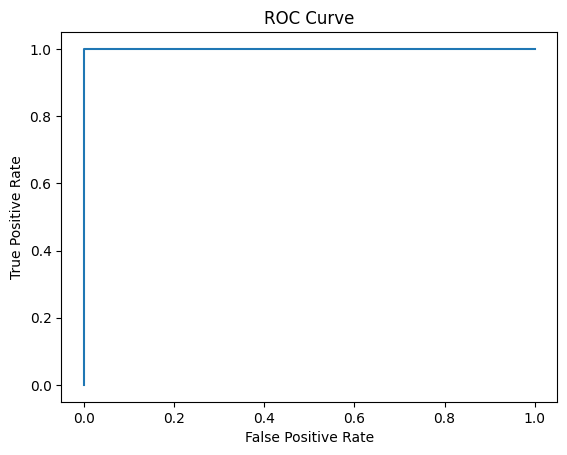

In [33]:
# Compute ROC curve
y_scores = model.predict_proba(X_test)[:, 1]
# Get true labels (ground truth) for the test data
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_test)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Something is wrong here, we need to check

## Simplify Model 

A simpler model is more generalizable. Let's reduce some of the complexity of the model by eliminating features using the RFE and VIF techniques. 

#### Feature Selection Using RFE

In [36]:
X_train.shape

(28831, 40)

They're 40 columns

In [39]:
from sklearn.feature_selection import RFE
# running RFE with 20 variable output. # 20 is a arbitrary number. 
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

The list below will show features that the RFE technique has ranked not included in the top 20. 

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['campaign', 'previous', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_student', 'marital_single', 'default_no', 'housing_no', 'loan_no',
       'poutcome_failure', 'poutcome_success', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'contact_cellular'],
      dtype='object')

In [42]:
col.shape

(20,)

The below used to access the column names of the features that were not selected by the RFE (Recursive Feature Elimination) method.

In [44]:
X_train.columns[~rfe.support_]

Index(['age', 'duration', 'pdays', 'cons.price.idx', 'nr.employed',
       'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_self-employed',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'default_yes', 'housing_yes', 'loan_yes',
       'education_basic.4y', 'education_illiterate',
       'education_professional.course', 'education_university.degree'],
      dtype='object')

Till now we have been using sklearn to build a logistic model. From this point let's start using stats models. Stats models gives addional infromation about the importance of features other things. 

## Assessing the model with StatsModels and selected columns

In [45]:
import statsmodels.api as sm

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28810
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8264.3
Date:                Tue, 18 Apr 2023   Deviance:                       16529.
Time:                        14:03:06   Pearson chi2:                 3.05e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1231
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1341      0.296      3.833      0.000       0.554       1.714
campaign                 -0.0558      0.011     -4.877      0.000      -0.078      -0.033
previous                  0.2221      0.062      3.572      0.000       0.100       0.344
emp.var.rate              0.1783      0.049      3.666      0.000       0.083       0.274
cons.conf.idx             0.0454      0.004     10.767      0.000       0.037       0.054
euribor3m                -0.5920      0.046    -12.950      0.000      -0.682      -0.502
job_blue-collar          -0.2910      0.067     -4.374      0.000      -0.421      -0.161
job_management            0.0808      0.080      1.008      0.314      -0.076       0.238
job_retired               0.3954      0.085      4.675      0.000       0.230       0.561
job_services             -0.1808      0.083     -2.171      0.030      -0.344      -0.018
job_student               0.3699      0.108      3.427      0.001       0.158       0.581
marital_single            0.0610      0.047      1.296      0.195      -0.031       0.153
default_no                0.3138      0.067      4.713      0.000       0.183       0.444
housing_no                0.0409      0.042      0.979      0.327      -0.041       0.123
loan_no                   0.0497      0.055      0.901      0.368      -0.058       0.158
poutcome_failure         -0.6661      0.099     -6.700      0.000      -0.861      -0.471
poutcome_success          1.2528      0.119     10.498      0.000       1.019       1.487
education_basic.6y       -0.0144      0.108     -0.134      0.893      -0.225       0.197
education_basic.9y       -0.1067      0.072     -1.477      0.140      -0.248       0.035
education_high.school    -0.1024      0.054     -1.889      0.059      -0.209       0.004
contact_cellular          0.4060      0.056      7.208      0.000       0.296       0.516
=========================================================================================
"""

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10] #this gives probability of each datapoint belonging to a particular class

31880    0.168571
38177    0.341235
2459     0.026244
756      0.039939
11275    0.031169
29677    0.191403
13016    0.053018
1518     0.039527
34983    0.135313
24965    0.036957
dtype: float64

In [56]:
y_train_pred_final = pd.DataFrame({'y':y_train.y, 'y_Prob':y_train_pred})
y_train_pred_final.head()

,y,y_Prob
31880,0,0.168571
38177,0,0.341235
2459,0,0.026244
756,0,0.039939
11275,0,0.031169


In [57]:
#Creating new column 'predicted' with 1 if y_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.tail()

,y,y_Prob,predicted
20757,0,0.076304,0
32103,0,0.227235,0
30403,1,0.193585,0
21243,0,0.078256,0
2732,0,0.045599,0


This code is likely used to add a predicted label column to the y_train_pred_final DataFrame based on a threshold of 0.5 for the 'y_Prob' values, where values greater than 0.5 are predicted as 1 and values less than or equal to 0.5 are predicted as 0.

Now from above you can see column Y is your actual Y values and predicted column is predicted Y values

In [58]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

[[25326   253]
 [ 2655   597]]


In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.8991363462939197


#### Define a function to calculate the accuracy score and the confusion metrics for the stats models 

In [60]:
def sm_model_evaluation (model, x_test, y_test, columns):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test[columns])
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test.y, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [61]:
sm_model_evaluation (res, X_test, y_test, col)

0.8977907259043457
[[10845   124]
 [ 1139   249]]


Let's try to build RFE for 10 - 40 features and keep on increasing from 10 untill 40 to find optimal level of features

In [63]:
for i in range(10, 41):
    rfe = RFE(model, n_features_to_select=i)           # running RFE with 20 variable output.
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print ("=====================================================")
    print (i)
    sm_model_evaluation (res, X_test, y_test, col)
    

10
0.897952577486445
[[10846   123]
 [ 1138   250]]
11
0.8978716516953953
[[10843   126]
 [ 1136   252]]
12
0.8978716516953953
[[10843   126]
 [ 1136   252]]
13
0.8977907259043457
[[10842   127]
 [ 1136   252]]
14
0.8977098001132962
[[10843   126]
 [ 1138   250]]
15
0.8976288743222465
[[10843   126]
 [ 1139   249]]
16
0.8978716516953953
[[10844   125]
 [ 1137   251]]
17
0.897952577486445
[[10845   124]
 [ 1137   251]]
18
0.897952577486445
[[10845   124]
 [ 1137   251]]
19
0.8977907259043457
[[10845   124]
 [ 1139   249]]
20
0.8977907259043457
[[10845   124]
 [ 1139   249]]
21
0.8995710933074371
[[10827   142]
 [ 1099   289]]
22
0.8995710933074371
[[10827   142]
 [ 1099   289]]
23
0.8995710933074371
[[10827   142]
 [ 1099   289]]
24
0.8995710933074371
[[10826   143]
 [ 1098   290]]
25
0.8994092417253379
[[10825   144]
 [ 1099   289]]
26
0.8994092417253379
[[10825   144]
 [ 1099   289]]
27
0.8994901675163874
[[10826   143]
 [ 1099   289]]
28
0.9126810714574735
[[10706   263]
 [  816   57

Conclusion: 

If we keep 28 features it appears that there is a slight improvement in performance which stays the same even if we increase the maximum features till 40. 

Let's find columns we need to keep. 

In [64]:
rfe = RFE(model, n_features_to_select=28)           # running RFE with 26 variable output.
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
sm_model_evaluation (res, X_test, y_test, col)

0.9126810714574735
[[10706   263]
 [  816   572]]


In [65]:
col

Index(['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_student', 'marital_married', 'marital_single', 'default_no',
       'housing_no', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_university.degree', 'contact_cellular'],
      dtype='object')

In [66]:
# Create correlation matrix
corr_matrix = X_train[col].corr().abs()
corr_matrix

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_management,job_retired,job_services,job_student,marital_married,marital_single,default_no,housing_no,loan_no,loan_yes,poutcome_failure,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_university.degree,contact_cellular
duration,1.000000,0.072814,0.021147,0.025821,0.003594,0.010005,0.031839,0.042158,0.011393,0.016304,0.001778,0.013210,0.001168,0.010743,0.001213,0.001846,0.009595,0.007433,0.004371,0.001269,0.008039,0.044398,0.010160,0.005467,0.005382,0.006013,0.016179,0.027909
campaign,0.072814,1.000000,0.077448,0.149065,0.125655,0.013693,0.133792,0.143049,0.010635,0.001923,0.008549,0.007906,0.001802,0.022952,0.000086,0.006612,0.039166,0.005931,0.004956,0.004858,0.068333,0.051658,0.001352,0.000190,0.001216,0.003141,0.000748,0.077274
previous,0.021147,0.077448,1.000000,0.414867,0.196346,0.052652,0.450066,0.498090,0.022097,0.058860,0.011114,0.057159,0.013585,0.097720,0.045502,0.050227,0.104639,0.026614,0.004197,0.007005,0.678401,0.527815,0.021513,0.021408,0.029361,0.007778,0.032278,0.212954
emp.var.rate,0.025821,0.149065,0.414867,1.000000,0.774732,0.190506,0.971979,0.905892,0.027743,0.063825,0.017083,0.107831,0.022374,0.136536,0.082826,0.101809,0.205157,0.058625,0.003554,0.001900,0.376177,0.256156,0.028976,0.026521,0.024484,0.014823,0.047516,0.393486
cons.price.idx,0.003594,0.125655,0.196346,0.774732,1.000000,0.053296,0.686644,0.518752,0.043830,0.081267,0.023427,0.059918,0.034738,0.061188,0.049403,0.066768,0.169180,0.075916,0.000300,0.006104,0.292439,0.074069,0.045011,0.035902,0.038553,0.006931,0.090502,0.590020
cons.conf.idx,0.010005,0.013693,0.052652,0.190506,0.053296,1.000000,0.273544,0.097973,0.033857,0.096740,0.004260,0.089729,0.056472,0.005585,0.062859,0.057798,0.026263,0.033202,0.007102,0.011532,0.157072,0.076285,0.019225,0.027404,0.071278,0.053341,0.072590,0.250862
euribor3m,0.031839,0.133792,0.450066,0.971979,0.686644,0.273544,1.000000,0.944825,0.027394,0.052835,0.002010,0.104472,0.017882,0.144626,0.092390,0.112710,0.197707,0.058848,0.002222,0.000542,0.379648,0.282570,0.026271,0.024364,0.022765,0.018423,0.036967,0.399385
nr.employed,0.042158,0.143049,0.498090,0.905892,0.518752,0.097973,0.944825,1.000000,0.027023,0.068948,0.003640,0.130208,0.023880,0.160761,0.085749,0.104591,0.191917,0.047577,0.004915,0.005831,0.344983,0.352553,0.015978,0.027170,0.033169,0.011242,0.037531,0.268902
job_admin.,0.011393,0.010635,0.022097,0.027743,0.043830,0.033857,0.027394,0.027023,1.000000,0.313936,0.160064,0.121801,0.191051,0.086495,0.121197,0.116522,0.122044,0.012476,0.015812,0.019894,0.005042,0.025345,0.180414,0.105764,0.164382,0.118352,0.332226,0.059697
job_blue-collar,0.016304,0.001923,0.058860,0.063825,0.081267,0.096740,0.052835,0.068948,0.313936,1.000000,0.147613,0.112327,0.176190,0.079767,0.128609,0.100102,0.177693,0.018053,0.006688,0.009493,0.017187,0.063085,0.262991,0.236372,0.373985,0.175353,0.337189,0.101750


In [68]:
import numpy as np

In [69]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [70]:
upper

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_management,job_retired,job_services,job_student,marital_married,marital_single,default_no,housing_no,loan_no,loan_yes,poutcome_failure,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_university.degree,contact_cellular
duration,NaN,0.072814,0.021147,0.025821,0.003594,0.010005,0.031839,0.042158,0.011393,0.016304,0.001778,0.013210,0.001168,0.010743,0.001213,0.001846,0.009595,0.007433,0.004371,0.001269,0.008039,0.044398,0.010160,0.005467,0.005382,0.006013,0.016179,0.027909
campaign,NaN,NaN,0.077448,0.149065,0.125655,0.013693,0.133792,0.143049,0.010635,0.001923,0.008549,0.007906,0.001802,0.022952,0.000086,0.006612,0.039166,0.005931,0.004956,0.004858,0.068333,0.051658,0.001352,0.000190,0.001216,0.003141,0.000748,0.077274
previous,NaN,NaN,NaN,0.414867,0.196346,0.052652,0.450066,0.498090,0.022097,0.058860,0.011114,0.057159,0.013585,0.097720,0.045502,0.050227,0.104639,0.026614,0.004197,0.007005,0.678401,0.527815,0.021513,0.021408,0.029361,0.007778,0.032278,0.212954
emp.var.rate,NaN,NaN,NaN,NaN,0.774732,0.190506,0.971979,0.905892,0.027743,0.063825,0.017083,0.107831,0.022374,0.136536,0.082826,0.101809,0.205157,0.058625,0.003554,0.001900,0.376177,0.256156,0.028976,0.026521,0.024484,0.014823,0.047516,0.393486
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.053296,0.686644,0.518752,0.043830,0.081267,0.023427,0.059918,0.034738,0.061188,0.049403,0.066768,0.169180,0.075916,0.000300,0.006104,0.292439,0.074069,0.045011,0.035902,0.038553,0.006931,0.090502,0.590020
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,0.273544,0.097973,0.033857,0.096740,0.004260,0.089729,0.056472,0.005585,0.062859,0.057798,0.026263,0.033202,0.007102,0.011532,0.157072,0.076285,0.019225,0.027404,0.071278,0.053341,0.072590,0.250862
euribor3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944825,0.027394,0.052835,0.002010,0.104472,0.017882,0.144626,0.092390,0.112710,0.197707,0.058848,0.002222,0.000542,0.379648,0.282570,0.026271,0.024364,0.022765,0.018423,0.036967,0.399385
nr.employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027023,0.068948,0.003640,0.130208,0.023880,0.160761,0.085749,0.104591,0.191917,0.047577,0.004915,0.005831,0.344983,0.352553,0.015978,0.027170,0.033169,0.011242,0.037531,0.268902
job_admin.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313936,0.160064,0.121801,0.191051,0.086495,0.121197,0.116522,0.122044,0.012476,0.015812,0.019894,0.005042,0.025345,0.180414,0.105764,0.164382,0.118352,0.332226,0.059697
job_blue-collar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147613,0.112327,0.176190,0.079767,0.128609,0.100102,0.177693,0.018053,0.006688,0.009493,0.017187,0.063085,0.262991,0.236372,0.373985,0.175353,0.337189,0.101750


In detail:

    corr_matrix: This is presumably a correlation matrix, which is a square matrix that shows the 
    correlation coefficients between pairs of variables. 
    It is likely a DataFrame or a NumPy array.

    np.ones(corr_matrix.shape): This creates a NumPy array of ones with the same shape as the corr_matrix. 
    The shape of corr_matrix is used to determine the size of the ones array, 
    which will have the same number of rows and columns as corr_matrix.

    np.triu(...): This is a NumPy function that returns 
    the upper triangle of a 2-D array as a boolean mask, 
    where the upper triangle elements are set to True and 
    the lower triangle elements are set to False. The k 
    parameter specifies the diagonal offset, where k=1 
    means the main diagonal is excluded and only the upper 
    triangle is selected.

    corr_matrix.where(...): This is a pandas DataFrame method 
    that returns a new DataFrame with values from corr_matrix 
    where the condition is True and NaN where the condition is 
    False. The condition in this case is the boolean mask generated 
    by np.triu(...), which selects the upper triangle of the corr_matrix.

    upper: This is a new DataFrame that contains the upper 
    triangle of the original corr_matrix with NaN values 
    in the lower triangle. It is likely used to extract 
    only the upper triangle of the correlation matrix for 
    further analysis or visualization, as the lower 
    triangle is redundant since the correlation matrix is symmetrical.

In the context of a correlation matrix, the upper triangle contains the unique pairwise correlations between variables, while the lower triangle is simply a mirror image of the upper triangle due to the symmetric nature of correlation matrices. Therefore, in many cases, only the upper triangle is of interest because it contains all the distinct correlation coefficients without duplication.

In [71]:
upper.style.background_gradient(cmap ='viridis')

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_management,job_retired,job_services,job_student,marital_married,marital_single,default_no,housing_no,loan_no,loan_yes,poutcome_failure,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_university.degree,contact_cellular
duration,nan,0.072814,0.021147,0.025821,0.003594,0.010005,0.031839,0.042158,0.011393,0.016304,0.001778,0.013210,0.001168,0.010743,0.001213,0.001846,0.009595,0.007433,0.004371,0.001269,0.008039,0.044398,0.010160,0.005467,0.005382,0.006013,0.016179,0.027909
campaign,nan,nan,0.077448,0.149065,0.125655,0.013693,0.133792,0.143049,0.010635,0.001923,0.008549,0.007906,0.001802,0.022952,0.000086,0.006612,0.039166,0.005931,0.004956,0.004858,0.068333,0.051658,0.001352,0.000190,0.001216,0.003141,0.000748,0.077274
previous,nan,nan,nan,0.414867,0.196346,0.052652,0.450066,0.498090,0.022097,0.058860,0.011114,0.057159,0.013585,0.097720,0.045502,0.050227,0.104639,0.026614,0.004197,0.007005,0.678401,0.527815,0.021513,0.021408,0.029361,0.007778,0.032278,0.212954
emp.var.rate,nan,nan,nan,nan,0.774732,0.190506,0.971979,0.905892,0.027743,0.063825,0.017083,0.107831,0.022374,0.136536,0.082826,0.101809,0.205157,0.058625,0.003554,0.001900,0.376177,0.256156,0.028976,0.026521,0.024484,0.014823,0.047516,0.393486
cons.price.idx,nan,nan,nan,nan,nan,0.053296,0.686644,0.518752,0.043830,0.081267,0.023427,0.059918,0.034738,0.061188,0.049403,0.066768,0.169180,0.075916,0.000300,0.006104,0.292439,0.074069,0.045011,0.035902,0.038553,0.006931,0.090502,0.590020
cons.conf.idx,nan,nan,nan,nan,nan,nan,0.273544,0.097973,0.033857,0.096740,0.004260,0.089729,0.056472,0.005585,0.062859,0.057798,0.026263,0.033202,0.007102,0.011532,0.157072,0.076285,0.019225,0.027404,0.071278,0.053341,0.072590,0.250862
euribor3m,nan,nan,nan,nan,nan,nan,nan,0.944825,0.027394,0.052835,0.002010,0.104472,0.017882,0.144626,0.092390,0.112710,0.197707,0.058848,0.002222,0.000542,0.379648,0.282570,0.026271,0.024364,0.022765,0.018423,0.036967,0.399385
nr.employed,nan,nan,nan,nan,nan,nan,nan,nan,0.027023,0.068948,0.003640,0.130208,0.023880,0.160761,0.085749,0.104591,0.191917,0.047577,0.004915,0.005831,0.344983,0.352553,0.015978,0.027170,0.033169,0.011242,0.037531,0.268902
job_admin.,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.313936,0.160064,0.121801,0.191051,0.086495,0.121197,0.116522,0.122044,0.012476,0.015812,0.019894,0.005042,0.025345,0.180414,0.105764,0.164382,0.118352,0.332226,0.059697
job_blue-collar,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.147613,0.112327,0.176190,0.079767,0.128609,0.100102,0.177693,0.018053,0.006688,0.009493,0.017187,0.063085,0.262991,0.236372,0.373985,0.175353,0.337189,0.101750


Till here using RFE we selected 28 columns and they gave us 91% accuracy

## Checking VIFs

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,nr.employed,36972.00
4,cons.price.idx,31704.91
6,euribor3m,260.99
5,cons.conf.idx,122.69
18,loan_no,36.35
3,emp.var.rate,30.75
19,loan_yes,7.42
14,marital_married,6.36
2,previous,5.74
16,default_no,5.38


In [74]:
#Columns with high VIF need to be dropped starting with euribor3m
col = col.drop(['nr.employed','cons.price.idx','marital_married','euribor3m','cons.conf.idx',
                'loan_no','emp.var.rate','loan_yes','previous','default_no'], 1)
col

Index(['duration', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'marital_single', 'housing_no', 'poutcome_failure', 'poutcome_success',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_university.degree',
       'contact_cellular'],
      dtype='object')

In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

In [76]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28812
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7129.2
Date:                Tue, 18 Apr 2023   Deviance:                       14258.
Time:                        14:42:05   Pearson chi2:                 4.82e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1895
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.1950      0.091    -46.310      0.000      -4.373      -4.017
duration                        0.0040   7.76e-05     51.814      0.000       0.004       0.004
campaign                       -0.1001      0.014     -7.374      0.000      -0.127      -0.074
job_admin.                      0.1183      0.064      1.859      0.063      -0.006       0.243
job_blue-collar                -0.4131      0.082     -5.050      0.000      -0.573      -0.253
job_management                  0.1302      0.094      1.391      0.164      -0.053       0.314
job_retired                     1.0443      0.095     10.962      0.000       0.858       1.231
job_services                   -0.2297      0.097     -2.366      0.018      -0.420      -0.039
job_student                     1.0231      0.120      8.546      0.000       0.788       1.258
marital_single                  0.1965      0.051      3.837      0.000       0.096       0.297
housing_no                     -0.0047      0.045     -0.104      0.917      -0.093       0.084
poutcome_failure                0.4181      0.065      6.407      0.000       0.290       0.546
poutcome_success                2.8500      0.079     36.070      0.000       2.695       3.005
education_basic.4y             -0.1164      0.098     -1.194      0.232      -0.308       0.075
education_basic.6y             -0.1946      0.129     -1.514      0.130      -0.447       0.057
education_basic.9y             -0.2336      0.091     -2.556      0.011      -0.413      -0.055
education_high.school          -0.1823      0.076     -2.388      0.017      -0.332      -0.033
education_university.degree     0.0507      0.071      0.717      0.474      -0.088       0.189
contact_cellular                0.9386      0.058     16.133      0.000       0.825       1.053
===============================================================================================
"""

Let's remove whos P-values do not oblique

In [78]:
col = col.drop(['job_management','housing_no','education_basic.4y','education_basic.6y','education_university.degree'], 1)
col

Index(['duration', 'campaign', 'job_admin.', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'marital_single', 'poutcome_failure',
       'poutcome_success', 'education_basic.9y', 'education_high.school',
       'contact_cellular'],
      dtype='object')

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

#### Evaluate the model 

In [80]:

X_sm = sm.add_constant(X_test[col])
y_pred = res.predict(X_sm)
y_train_pred_final = pd.DataFrame({'y':y_test.y, 'y_Prob':y_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

0.9054786760540584
[[10718   251]
 [  917   471]]


## Finding optimal cut off point

Recall is the metric we will follow since we want to capture as many positives as possible.

At the same time while increasing recall, precision also decreases. Let let's calcualte recall and precision for all thresholds and find the optimum point.


The below code is creating columns with different probability cutoffs for a logistic regression model.

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
15500,1,0.155534,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29034,0,0.049971,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11199,0,0.015437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22247,0,0.031689,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27180,0,0.049542,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1. numbers = [float(x)/20 for x in range(20)]: This line creates a list of 
  numbers ranging from 0 to 1, with increments of 0.05 (i.e., 20 intervals) The list is created using a list comprehension, where each number is obtained by dividing x (ranging from 0 to 19) by 20, resulting in values in the range of 0.0 to 1.0 with a step size of 0.05.

2. y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0): This line creates a new column in the y_train_pred_final DataFrame for each number in the numbers list. The column name is set as the value of i, which represents the probability cutoff.

3. y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0): This part of the code uses the map() function to apply a lambda function to each value in the y_Prob column of the y_train_pred_final DataFrame. The lambda function compares each value x in the y_Prob column with the current cutoff value i. If x is greater than i, it assigns a value of 1, otherwise it assigns a value of 0.

4. y_train_pred_final.head(): This line prints the first few rows of the updated y_train_pred_final DataFrame, showing the added columns with different probability cutoffs and their corresponding binary predictions (1 or 0) based on the cutoff values.


Finding the optimal cutoff point for a logistic model typically involves using evaluation metrics such as sensitivity, specificity, accuracy, F1 score, or the area under the receiver operating characteristic (ROC) curve

In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.112325,0.112325,1.000000
0.05,0.05,0.595452,0.211535,0.953890
0.10,0.10,0.814518,0.357052,0.813401
0.15,0.15,0.873918,0.460280,0.709654
0.20,0.20,0.892126,0.516457,0.621758
0.25,0.25,0.901999,0.564177,0.560519
0.30,0.30,0.904265,0.586938,0.498559
0.35,0.35,0.904831,0.601923,0.451009
0.40,0.40,0.906450,0.624731,0.418588
0.45,0.45,0.904588,0.628853,0.367435


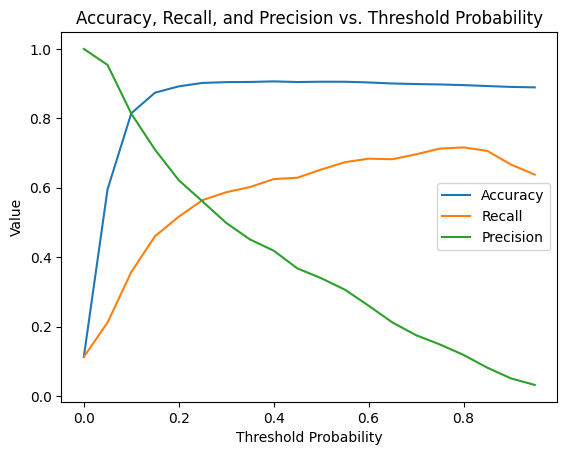

In [85]:
import matplotlib.pyplot as plt

# Plot accuracy, recall, and precision for various threshold probabilities
plt.plot(cutoff_df.index, cutoff_df['accuracy'], label='Accuracy')
plt.plot(cutoff_df.index, cutoff_df['recall'], label='Recall')
plt.plot(cutoff_df.index, cutoff_df['precision'], label='Precision')

# Set labels and title
plt.xlabel('Threshold Probability')
plt.ylabel('Value')
plt.title('Accuracy, Recall, and Precision vs. Threshold Probability')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
15500,1,0.155534,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29034,0,0.049971,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11199,0,0.015437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22247,0,0.031689,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27180,0,0.049542,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.9019988670389253

In [88]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2

array([[10368,   601],
       [  610,   778]])